In [27]:
import pandas as pd

In [28]:
df=pd.read_csv("income.csv")
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [29]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [30]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [31]:
df=pd.concat([df.drop("occupation", axis=1),pd.get_dummies(df.occupation).add_prefix("occupation_")], axis=1)
df=pd.concat([df.drop("workclass", axis=1),pd.get_dummies(df.workclass).add_prefix("workclass")], axis=1)
df=df.drop("education", axis=1)
df=pd.concat([df.drop("marital-status", axis=1),pd.get_dummies(df["marital-status"]).add_prefix("material-status_")], axis=1)
df=pd.concat([df.drop("relationship", axis=1),pd.get_dummies(df.relationship).add_prefix("relationship_")], axis=1)
df=pd.concat([df.drop("race", axis=1),pd.get_dummies(df.race).add_prefix("race_")], axis=1)
df=pd.concat([df.drop("native-country", axis=1),pd.get_dummies(df["native-country"]).add_prefix("native-country_")], axis=1)


In [32]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,Male,0,0,50,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,Male,7688,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
4,18,103497,10,Female,0,0,30,<=50K,True,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48838,40,154374,9,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,False,True,False,False
48839,58,151910,9,Female,0,0,40,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False
48840,22,201490,9,Male,0,0,20,<=50K,False,True,...,False,False,False,False,False,False,False,True,False,False


In [33]:
df["gender"]=df["gender"].apply(lambda x:1 if x=="Male"else 0)
df["income"]=df["income"].apply(lambda x:1 if x==">50K"else 0)

In [34]:
df["income"]

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int64

<Axes: >

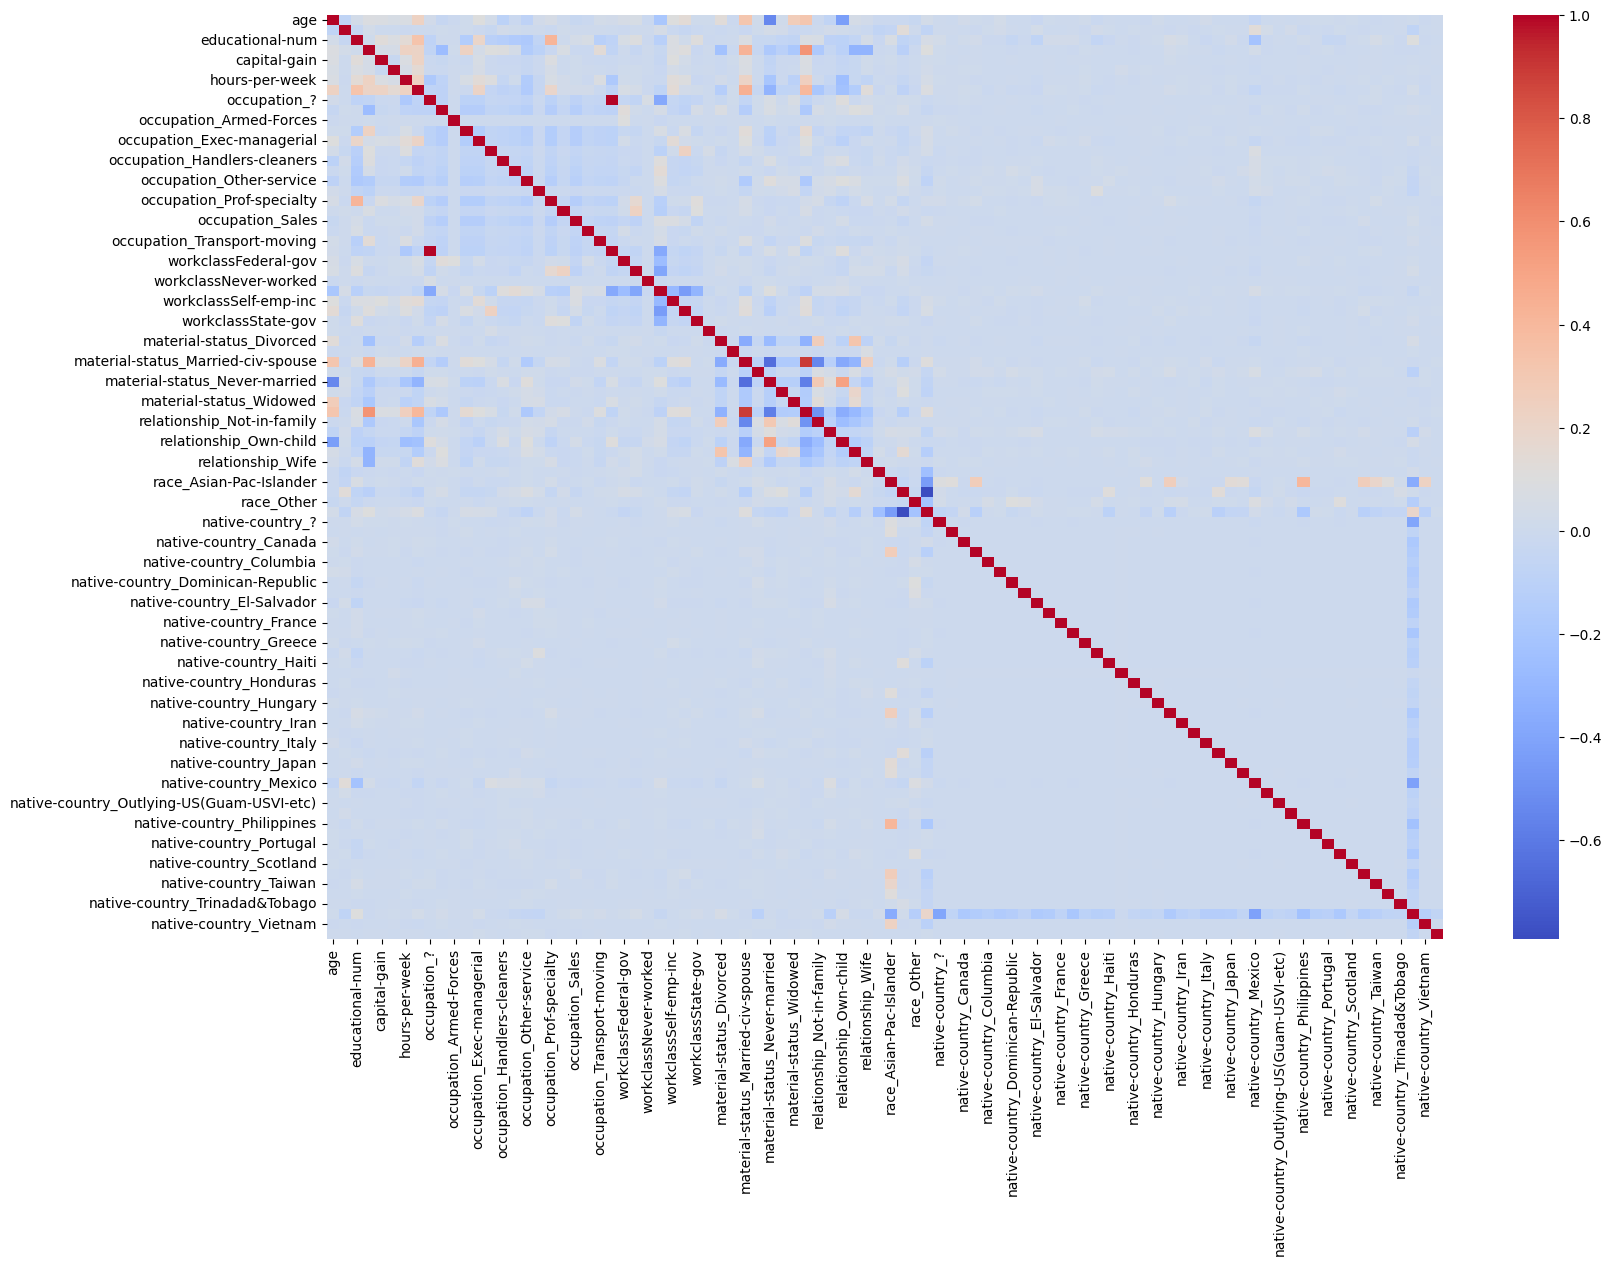

In [35]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),annot=False, cmap=("coolwarm"))

In [36]:
df.corr()


,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.025683,-0.038116,...,0.007016,0.005474,0.012281,-0.001942,-0.011872,-0.001766,0.001056,0.011888,-0.012337,0.002905
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005405,0.007480,...,-0.013577,0.008708,-0.006523,-0.010342,-0.001733,-0.001512,0.004153,-0.070645,-0.007479,0.004699
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.080053,0.004142,...,-0.047816,-0.041776,0.000907,0.012984,0.045420,0.007283,-0.010201,0.104210,-0.007544,-0.005798
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.063844,-0.260349,...,0.009649,-0.009940,-0.002178,-0.005272,0.003041,-0.007117,-0.009342,-0.011167,-0.001545,0.005262
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019157,-0.029105,...,-0.004355,-0.006137,-0.002317,0.003906,0.004260,-0.002781,-0.003039,0.004191,-0.002673,-0.000474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_Thailand,-0.001766,-0.001512,0.007283,-0.007117,-0.002781,-0.002338,0.008558,-0.004219,-0.002575,-0.001157,...,-0.000919,-0.001525,-0.000514,-0.001204,-0.000905,1.000000,-0.000583,-0.073329,-0.001041,-0.000538
native-country_Trinadad&Tobago,0.001056,0.004153,-0.010201,-0.009342,-0.003039,0.004028,-0.002911,-0.009107,-0.002068,0.007917,...,-0.000872,-0.001446,-0.000488,-0.001143,-0.000859,-0.000583,1.000000,-0.069564,-0.000988,-0.000510
native-country_United-States,0.011888,-0.070645,0.104210,-0.011167,0.004191,0.009449,0.004390,0.032551,0.005546,0.022126,...,-0.109626,-0.181890,-0.061346,-0.143695,-0.107976,-0.073329,-0.069564,1.000000,-0.124226,-0.064202
native-country_Vietnam,-0.012337,-0.007479,-0.007544,-0.001545,-0.002673,-0.000118,-0.008289,-0.015542,-0.004082,0.010905,...,-0.001557,-0.002583,-0.000871,-0.002040,-0.001533,-0.001041,-0.000988,-0.124226,1.000000,-0.000912


In [37]:
correlations = df.corr()["income"].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)


In [38]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclassSelf-emp-inc,material-status_Divorced,material-status_Married-civ-spouse,material-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,False,False,False,False,False,False,True,False,False,True,False,False
1,38,9,1,0,0,50,0,False,False,False,False,False,True,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
4,18,10,0,0,0,30,0,False,False,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,False,False,False,False,False,True,False,False,False,False,False,True
48838,40,9,1,0,0,40,1,False,False,False,False,False,True,False,True,False,False,False,False
48839,58,9,0,0,0,40,0,False,False,False,False,False,False,False,False,False,False,True,False
48840,22,9,1,0,0,20,0,False,False,False,False,False,False,True,False,False,True,False,False


<Axes: >

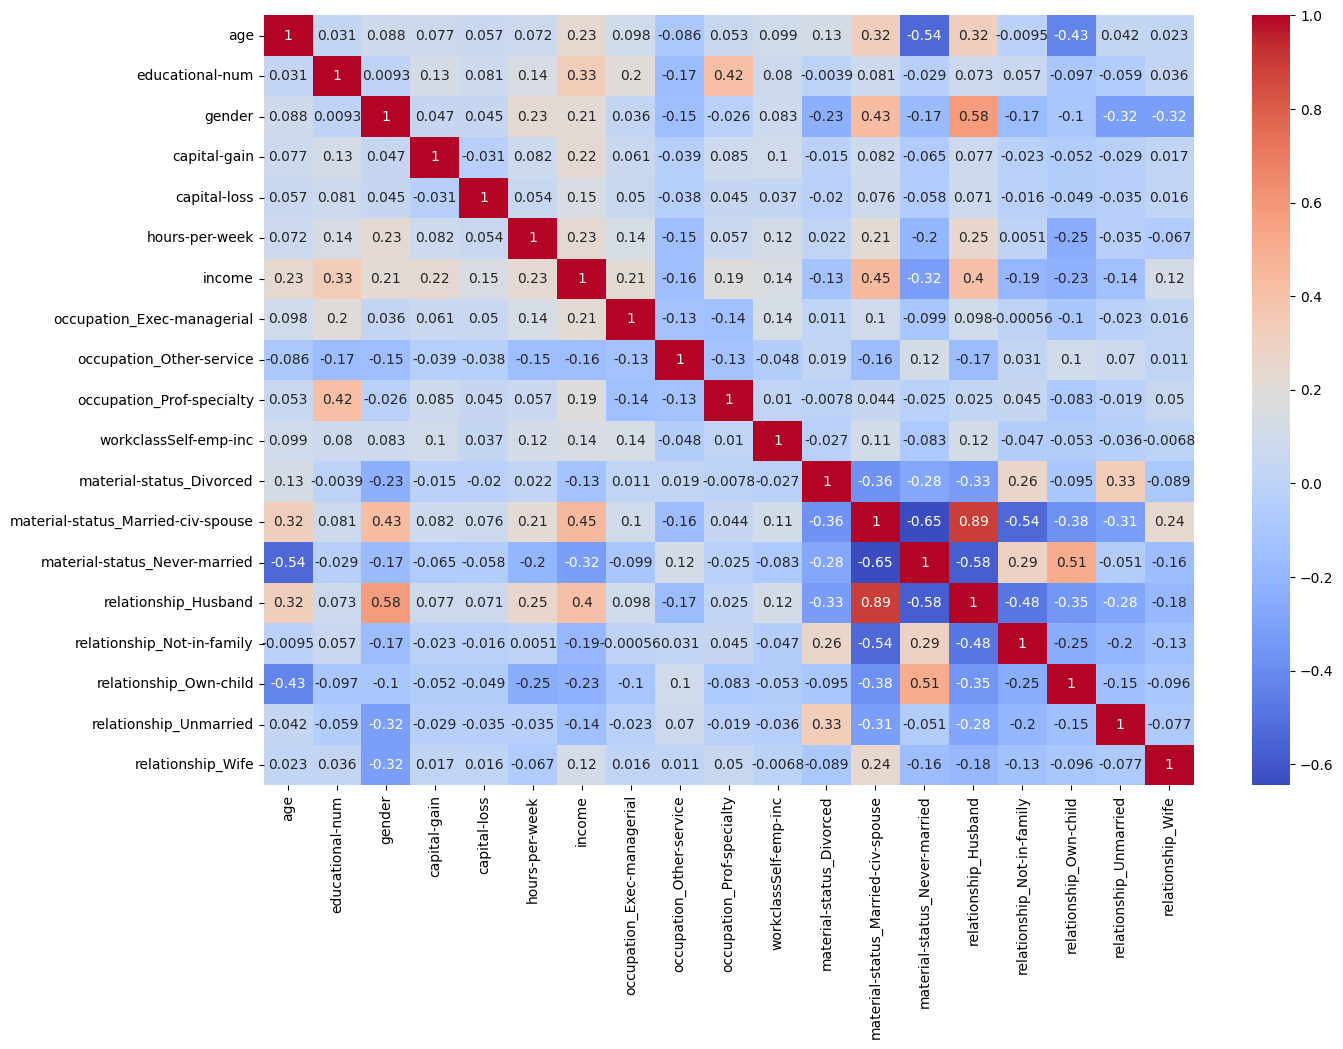

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(df_dropped.corr(),annot=True, cmap=("coolwarm"))

In [40]:


from sklearn.model_selection import train_test_split 

train_df, test_df= train_test_split(df, test_size=0.2)

In [41]:
train_df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
33955,36,437890,9,1,0,0,90,0,False,False,...,False,False,False,False,False,False,False,True,False,False
25429,21,80680,9,0,0,0,40,0,True,False,...,False,False,False,False,False,False,False,True,False,False
34913,47,61885,13,1,15024,0,50,1,False,False,...,False,False,False,False,False,False,False,True,False,False
43120,41,206066,10,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
21579,33,100135,9,0,0,1740,25,0,False,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35974,43,96483,9,0,0,0,40,0,False,False,...,False,False,False,True,False,False,False,False,False,False
33610,30,174789,9,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,True,False,False
19017,37,297449,9,1,0,0,40,1,False,False,...,False,False,False,False,False,False,False,True,False,False
7099,48,259131,10,1,5455,0,40,0,False,True,...,False,False,False,False,False,False,False,True,False,False


In [42]:
train_x=train_df.drop("income",axis=1)
train_y=train_df["income"]

test_x=test_df.drop("income",axis=1)
test_y=test_df["income"]

In [46]:
from sklearn.ensemble import RandomForestClassifier
forest= RandomForestClassifier()

forest.fit(train_x,train_y)

RandomForestClassifier()

In [49]:
forest.score(test_x,test_y)

0.8570989865902344

In [52]:
importances=dict(zip(forest.feature_names_in_,forest.feature_importances_))
importances={k:v for k, v in sorted (importances.items(), key=lambda x:x[1], reverse=True)}

In [53]:
importances

{'fnlwgt': 0.1720623071827976,
 'age': 0.15108161448974183,
 'educational-num': 0.10373484401529025,
 'capital-gain': 0.10066848539139225,
 'hours-per-week': 0.08578802795063548,
 'material-status_Married-civ-spouse': 0.06985608691586048,
 'relationship_Husband': 0.045233769252941834,
 'capital-loss': 0.03131433355427751,
 'material-status_Never-married': 0.02251471000785711,
 'occupation_Exec-managerial': 0.019645664771379814,
 'occupation_Prof-specialty': 0.017539748609081217,
 'gender': 0.012127562380113156,
 'relationship_Not-in-family': 0.009982727525730909,
 'relationship_Wife': 0.009304810151617873,
 'relationship_Own-child': 0.008749018545823488,
 'workclassPrivate': 0.008653771437958016,
 'occupation_Other-service': 0.008216540947052146,
 'workclassSelf-emp-not-inc': 0.007636560545339509,
 'occupation_Craft-repair': 0.005945286238230621,
 'native-country_United-States': 0.005837269637169054,
 'race_White': 0.005810339576670675,
 'occupation_Sales': 0.005763450659994478,
 'work

In [57]:
from sklearn.model_selection import GridSearchCV
param_grid={
    "n-estimators":[50,100,250],
    "max_depth":[5,10,30,None],
    "min_samples_split":[2,4],
    "max_features":["sqrt", "log2"]
}
grid_search=GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=param_grid, verbose=10)

In [58]:
grid_search.fit(train_x,train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n-estimators=50


ValueError: Invalid parameter 'n-estimators' for estimator RandomForestClassifier(max_depth=5). Valid parameters are: ['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'].